In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import sys
sys.path.append('/content/gdrive/My Drive')

import os
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


Source code berikut berfungsi untuk menghubungkan antara google colab dengan gdrive akun milik Anda. Diharapkan di gdrive anda sudah terdapat folder Dataset. Source code berikut juga mengubah working path anda ke path "/content/gdrive/My Drive", karena google colab ini menggunakan linux sebagai os-nya maka command-command linux dapat digunakan disini.

In [ ]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

function yang akan digunakan untuk mengecek path tree dari sebuah folder.
Source: 

In [ ]:
from imutils import paths

imgpths = paths.list_images('Dataset')
list_files('Dataset')

Dataset/
    turkis/
        turkis1.jpg
        turkis2.jpg
        turkis3.jpg
        turkis4.jpg
        turkis5.jpg
        turkis6.jpg
        turkis7.jpg
        turkis8.jpg
        turkis9.jpg
        turkis10.jpg
        turkis11.jpg
        turkis12.jpg
        turkis13.jpg
        turkis14.jpg
        turkis15.jpg
        turkis16.jpg
        turkis17.jpg
        turkis18.jpg
        turkis19.jpg
        turkis20.jpg
        turkis21.jpg
        turkis22.jpg
        turkis23.jpg
        turkis24.jpg
        turkis25.jpg
        turkis26.jpg
        turkis27.jpg
        turkis28.jpg
        turkis29.jpg
        turkis30.jpg
        turkis31.jpg
        turkis32.jpg
        turkis33.jpg
        turkis34.jpg
        turkis35.jpg
        turkis36.jpg
        turkis37.jpg
        turkis38.jpg
        turkis39.jpg
        turkis40.jpg
        turkis41.jpg
        turkis42.jpg
        turkis43.jpg
        turkis44.jpg
        turkis45.jpg
        turkis46.jpg
        turkis47.jpg
 

Simpan nama folder dari satu dir yang sama dengan working path. Contoh pada source code di atas, daataset disimpan pada folder Dataset. *imgpths* menyimpan nama folder, sedangkan untuk code berikutnya berfungsi menggunakan function *list_files* dari code sebelumnya dengan input nama folder letak disimpannya dataset.

Dataset
turkis


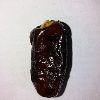

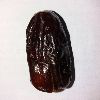

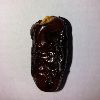

saudia


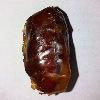

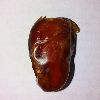

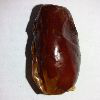

amirhajj


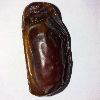

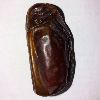

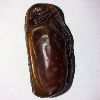

In [ ]:
from PIL import Image
import os
from IPython.display import display 
from imutils import paths

imgpths = paths.list_images('Dataset')
print('Dataset')
count=0
kelas_seb = None
for dirimg in imgpths:
  kelas = dirimg.split(os.path.sep) [1]
  if kelas_seb is None:
    print(kelas)
    kelas_seb = kelas
  if kelas_seb != kelas:
    print(kelas)
    count=0
    kelas_seb = kelas
  a = Image.open(dirimg)
 
  count=count+1
  if count <= 3:
    display(a)
  else:
    continue


Source code berikut berfungsi untuk mengambil nama folder yang ada pada folder Dataset dan mengambil setiap nama file gambar, kemudian untuk setiap folder atau kelas yang ada di Dataset akan ditampilkan gambar yang ada di subfolder berikut masing-masing 3 gambar.

In [ ]:
imgpths = paths.list_images('Dataset')
count=1
kelas_seb = None
for dirimg in imgpths:
  dir = dirimg.split(os.path.sep)[0]
  kelas = dirimg.split(os.path.sep)[1]
  nama = dirimg.split(os.path.sep)[2]
  if kelas_seb is None:
    kelas_seb = kelas
  if kelas_seb != kelas:
    count=1
    kelas_seb = kelas
  pat = os.path.join(dir,kelas,nama)
  nama_baru = kelas+str(count)+'.jpg'
  os.rename(pat,os.path.join(dir,kelas,nama_baru))
  count=count+1


Source code berikut berfungsi untuk mengubah nama file dari setiap gambar yang berada dalam folder kelas menjadi berformat "(nama kelas)1.jpg", "(nama kelas)2.jpg", dst.

In [ ]:
def unique(list1):
 
    unique_list = []
     
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

Sebuah function untuk mendapatkan nilai-nilai unik dari sebuah list, menjadi list baru yang berisi nilai-nilai yang tidak berulang alias unik.

In [ ]:
import numpy as np

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224))) / 255.0
  kumpl_gmbr.append(gmbrz)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)
kelas_asli

['turkis', 'saudia', 'amirhajj']

Source code berikut berfungsi untuk mengumpulkan semua gambar dataset dalam satu variabel dan melakukan rescale serta normalisasi dengan membagi nilai warna dengan 255. Kemudian menyimpan label dari setiap gambar sesuai dengan posisi gambar berada di subfolder kelas mana. Lalu, mendapatkan nilai unique dari label ini sehingga dapat mengetahui ada berapa kelas dalam dataset tersebut.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
kumpl_lbl = lb.fit_transform(kumpl_lbl)
if len(kelas_asli)==2:
  kumpl_lbl = np.hstack((kumpl_lbl, 1 - kumpl_lbl))

fungsi LabelBinarizer berfungsi untuk mengubah label yang sebelumnya berbentuk string sesuai nama kelas menjadi berbentuk binary, untuk setiap kolom-nya akan merepresentasikan kelas yang ada. Untuk baris akan mewakili banyaknya jumlah data yang ada. Untuk catatan, ada beberapa model ML yang harus menggunakan label dalam bentuk binary dan ada pun yang tidak, apabila tidak maka source code berikut tidak perlu dijalankan.

In [ ]:
from sklearn.model_selection import train_test_split

(latihX, ujiX, latihY, ujiY) = train_test_split(np.array(kumpl_gmbr),np.array(kumpl_lbl), test_size=0.2)

print(latihX.shape)
print(ujiX.shape)
print(latihY.shape)
print(ujiY.shape)

(120, 224, 224, 3)
(30, 224, 224, 3)
(120, 3)
(30, 3)


train_test_split berfungsi untuk membagi secara acak data yang akan menjadi data latih dan data uji dengan input berdasarkan dari variabel gambar dan variabel dari label. nilai pada test_size akan mempengaruhi persentase untuk pembagian data yang akan menjadi data latih dan data uji.

Data Latih
turkis


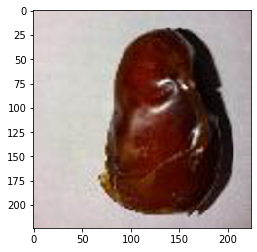

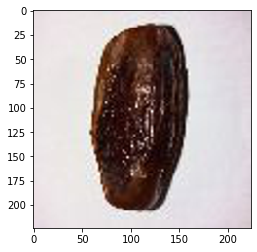

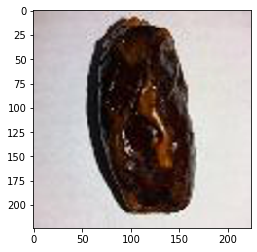

saudia


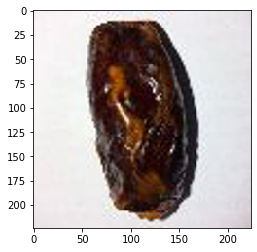

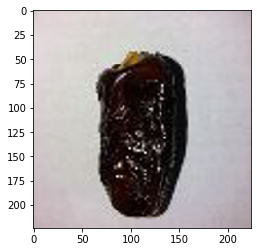

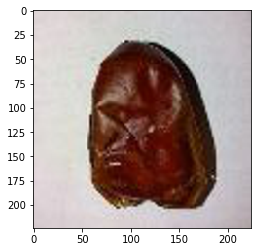

amirhajj


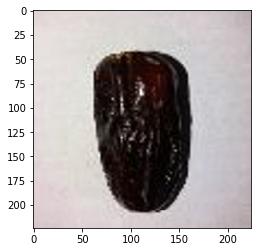

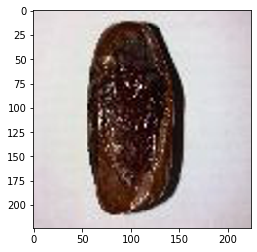

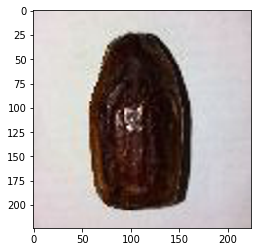

Data Uji
turkis


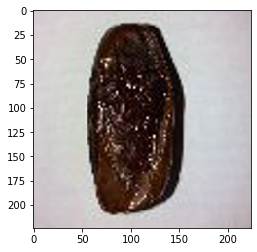

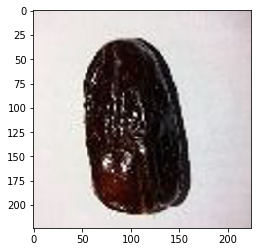

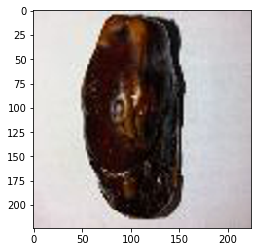

saudia


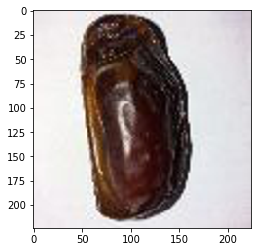

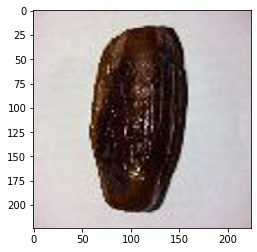

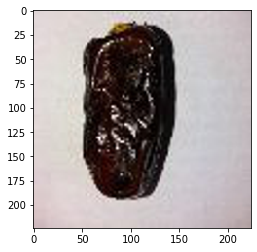

amirhajj


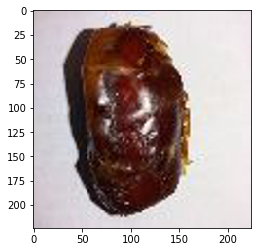

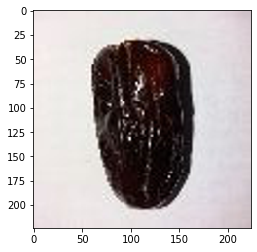

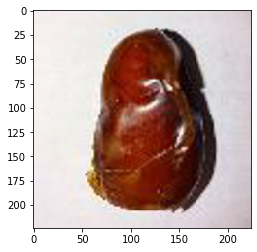

In [ ]:
from matplotlib import pyplot as plt

banyak_lth=latihX.shape
banyak_uji=ujiX.shape
total = banyak_lth[0]+banyak_uji[0]
num_kelas = kumpl_lbl.shape
jum_kls=num_kelas[1]
la_tmpl = banyak_lth[0]/num_kelas[1]
uji_tmpl = banyak_uji[0]/num_kelas[1]

print('Data Latih')
i=0
print(kelas_asli[0])
kk=1

x=0
while x < banyak_lth[0]:
  if i==3:
    if x<la_tmpl*(jum_kls-1):
      print(kelas_asli[kk])
    if i==3:
      x=x+la_tmpl-i
      if  x >= banyak_lth[0]:
        break
      kk=kk+1
      i=0
  plt.imshow(latihX[int(x)], interpolation='nearest')
  plt.show()
  i=i+1
  x=x+1

print('Data Uji')
i=0
print(kelas_asli[0])
kk=1

x=0
while x < banyak_uji[0]:
  if i==3:
    if x<uji_tmpl*(jum_kls-1):
      print(kelas_asli[kk])
    if i==3:
      x=x+uji_tmpl-i
      if  x >= banyak_uji[0]:
        break
      kk=kk+1
      i=0
  plt.imshow(ujiX[int(x)], interpolation='nearest')
  plt.show()
  i=i+1
  x=x+1

Source code pada cell berikut berfungsi menampilkan data uji dan data latih untuk masing-masing kelas sebanyak 3 gambar. 

In [ ]:
def image_to_feature_vector(image, size=(224, 224)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	# handle normalizing the histogram if we are using OpenCV 2.4.X
	if imutils.is_cv2():
		hist = cv2.normalize(hist)
	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
	else:
		cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

Kedua function berikut berfungsi untuk mengekstrak nilai warna dari sebuah gambar yang memiliki 3 dimensi menjadi 1 dimensi. Nilai ini nantinya akan menjadi input untuk model Machine Learning.

In [ ]:
import numpy as np
import cv2

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224)))
  nil_pix = image_to_feature_vector(gmbrz)

  kumpl_gmbr.append(nil_pix)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)


Source code berikut hampir sama dengan source code untuk memasukkan gambar ke variabel serta label ke variabelnya, hanya saja disisipkan dengan function yang sudah dijelaskan pada cell sebelumnya. Sehingga nilai gambar yang masuk ke variabel sudah merupakan nilai gambar yang memiliki 1 dimensi.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
kumpl_lbl = lb.fit_transform(kumpl_lbl)
if len(kelas_asli)==2:
  kumpl_lbl = np.hstack((kumpl_lbl, 1 - kumpl_lbl))

source code berikut untuk mengubah variabel label yang sebelumnya berisi nama kelas (string) menjadi berbentuk biner. Kemudian terdapat source code yang berfungsi untuk mengubah label biner yang terbentuk oleh 2 kelas menjadi memiliki 2 kolom, pada mulanya apabila tidak menggunakan fungsi if ini untuk 2 label hanya akan memiliki 1 kolom.

In [ ]:
from sklearn.model_selection import train_test_split

(latihX, ujiX, latihY, ujiY) = train_test_split(np.array(kumpl_gmbr),np.array(kumpl_lbl), test_size=0.2)

print(latihX.shape)
print(ujiX.shape)
print(latihY.shape)
print(ujiY.shape)

(120, 150528)
(30, 150528)
(120, 3)
(30, 3)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

acc_kmpl = []
print("[INFO] Proses Latih Model")
for k in range(1,21):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(latihX, latihY)
  acc = model.score(ujiX, ujiY)
  acc_kmpl.append(acc)
  print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100)+' with k = '+str(k))

[INFO] Proses Latih Model
[INFO] raw pixel accuracy: 90.00% with k = 1
[INFO] raw pixel accuracy: 76.67% with k = 2
[INFO] raw pixel accuracy: 80.00% with k = 3
[INFO] raw pixel accuracy: 76.67% with k = 4
[INFO] raw pixel accuracy: 83.33% with k = 5
[INFO] raw pixel accuracy: 76.67% with k = 6
[INFO] raw pixel accuracy: 83.33% with k = 7
[INFO] raw pixel accuracy: 73.33% with k = 8
[INFO] raw pixel accuracy: 76.67% with k = 9
[INFO] raw pixel accuracy: 70.00% with k = 10
[INFO] raw pixel accuracy: 73.33% with k = 11
[INFO] raw pixel accuracy: 56.67% with k = 12
[INFO] raw pixel accuracy: 70.00% with k = 13
[INFO] raw pixel accuracy: 60.00% with k = 14
[INFO] raw pixel accuracy: 66.67% with k = 15
[INFO] raw pixel accuracy: 56.67% with k = 16
[INFO] raw pixel accuracy: 60.00% with k = 17
[INFO] raw pixel accuracy: 50.00% with k = 18
[INFO] raw pixel accuracy: 56.67% with k = 19
[INFO] raw pixel accuracy: 50.00% with k = 20


Source code berikut berfungsi untuk pembentukkan model KNN dan menentukan hyperparameter-nya, kemudian melakukan proses training dan evaluasi model ML. Pada source code berikut bertujuan untuk menghasilkan nilai akurasi dari model KNN dengan nilai neighbour dari 1-20. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("[INFO] Proses Latih Model")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(latihX, latihY)
acc = model.score(ujiX, ujiY)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] Proses Latih Model
[INFO] raw pixel accuracy: 90.00%


Source code berikut membentuk model KNN dan mengevaluasi nya, setelah menjalankan Cell sebelumnya kita dapat mengetahui berapa nilai n KNN yang dapat menghasilkan akurasi terbaik dari nilai n 1-20.

Text(0, 0.5, 'Accuracy')

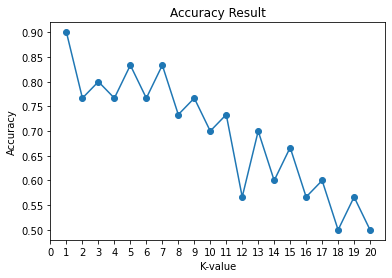

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
nil = np.arange(1,21)
ax.plot(np.arange(1,21), acc_kmpl, 'o-')
plt.xticks(np.arange(0, max(nil)+1, 1))
ax.set_title('Accuracy Result')
ax.set_xlabel('K-value')
ax.set_ylabel('Accuracy')

Source code berikut berfungsi untuk menampilkan grafik akurasi untuk setiap model KNN yang telah dirancang pada program sebelumnya, dengan menggunakan library dari matplotlib

In [ ]:
from sklearn.metrics import confusion_matrix
predict = model.predict(ujiX)
rounded_pred=np.argmax(predict, axis=1)
rounded_ujiY=np.argmax(ujiY, axis=1)
print(confusion_matrix(rounded_ujiY, rounded_pred))


[[ 8  0  2]
 [ 0 12  1]
 [ 0  0  7]]


Source code berikut berfungsi untuk menampilkan confusion matrix dari model KNN yang telah dirancang, dengan memanfaatkan confusion matrix kita dapat mengetahui ketepatan pendeteksian untuk masing-masing kelas.

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names=kelas_asli,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    if normalize:
      plt.imshow(cm/7, interpolation='nearest', cmap=cmap)
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Function confusion matrix untuk menampilkan grafik confusion matrix dengan representasi yang lebih mudah dipahami.


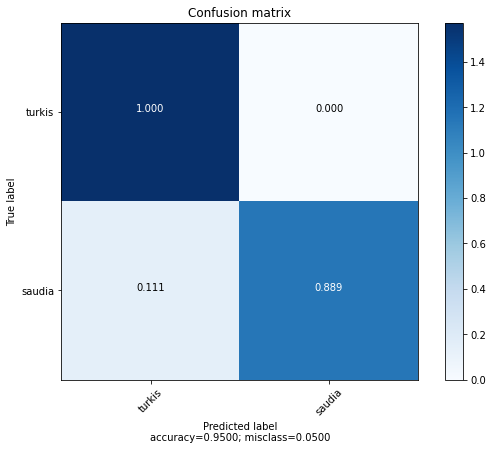

In [ ]:
cm = confusion_matrix(rounded_ujiY,  rounded_pred)
plot_confusion_matrix(cm)

Berikut code untuk menggunakan function grafik tabel confusion matrix

**SVM**

In [ ]:
import numpy as np
import cv2
from skimage.color import rgb2gray


kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224)))
  grey_image = rgb2gray(gmbrz)
  nil_pix = image_to_feature_vector(grey_image)

  kumpl_gmbr.append(nil_pix)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)

In [ ]:
from sklearn.model_selection import train_test_split

(latihX, ujiX, latihY, ujiY) = train_test_split(np.array(kumpl_gmbr),np.array(kumpl_lbl), test_size=0.2)

print(latihX.shape)
print(ujiX.shape)
print(latihY.shape)
print(ujiY.shape)

(120, 50176)
(30, 50176)
(120,)
(30,)


In [ ]:
from sklearn import svm
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(latihX, latihY)
acc = svm.score(ujiX, ujiY)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] raw pixel accuracy: 96.67%


Pembentukkan model SVM

In [ ]:
from sklearn.svm import SVC
jen_kernel = ['linear', 'poly', 'rbf', 'sigmoid']
acc_kmpl = []
pred_kmpl = []

for k in range(len(jen_kernel)):
  svm = SVC(kernel=jen_kernel[k])
  svm.fit(latihX, latihY)
  acc = svm.score(ujiX, ujiY)
  acc_kmpl.append(acc)
  predict = svm.predict(ujiX)
  pred_kmpl.append(predict)
  print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100)+' with kernel = '+str(jen_kernel[k]))


[INFO] raw pixel accuracy: 96.67% with kernel = linear
[INFO] raw pixel accuracy: 96.67% with kernel = poly
[INFO] raw pixel accuracy: 96.67% with kernel = rbf
[INFO] raw pixel accuracy: 30.00% with kernel = sigmoid


Pengujian model SVM untuk segala jenis kernel.

In [ ]:
from sklearn.metrics import confusion_matrix
predict = svm.predict(ujiX)
print(confusion_matrix(ujiY, predict))

[[ 9  0  0]
 [ 0 11  0]
 [ 1  0  9]]


In [ ]:
ujiX

array([[0.86127804, 0.86127804, 0.85735647, ..., 0.77191529, 0.76799373,
        0.76799373],
       [0.90190039, 0.90190039, 0.90190039, ..., 0.67860824, 0.69037294,
        0.70213765],
       [0.83017333, 0.83017333, 0.83017333, ..., 0.65256392, 0.64864235,
        0.64864235],
       ...,
       [0.84699843, 0.84699843, 0.85092   , ..., 0.6923451 , 0.68842353,
        0.68842353],
       [0.67331059, 0.67331059, 0.67723216, ..., 0.83382706, 0.83382706,
        0.83382706],
       [0.85484157, 0.85484157, 0.85876314, ..., 0.63466039, 0.63466039,
        0.63466039]])

In [ ]:
import pickle
pickle.dump(svm, open('SVM.pkl','wb'))

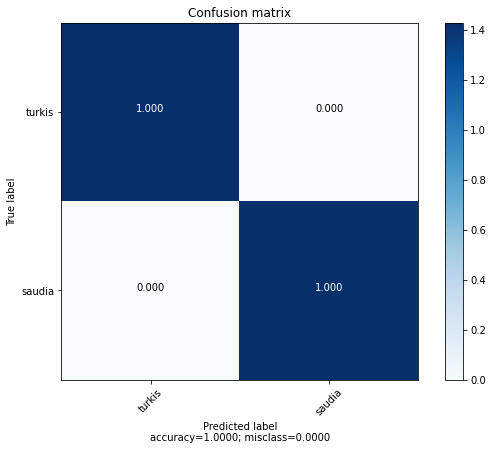

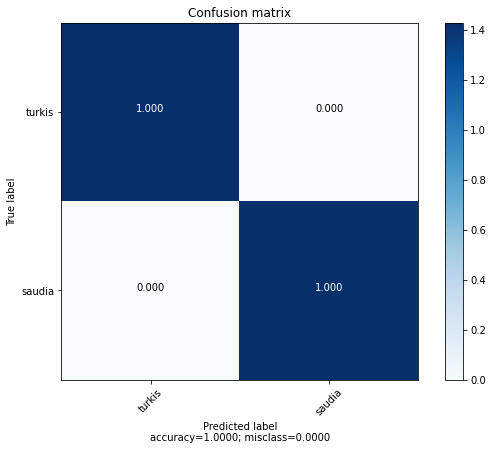

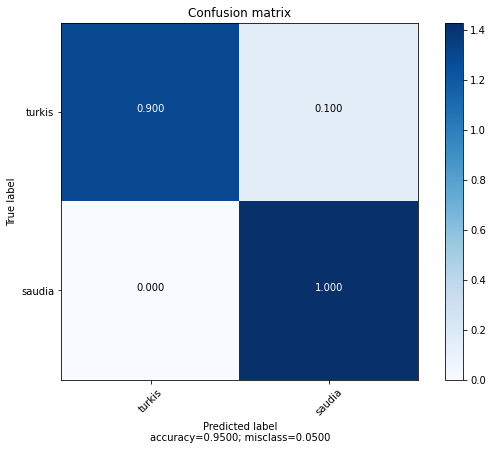

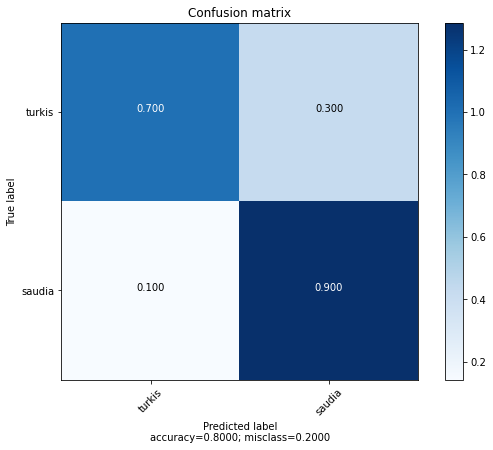

In [ ]:
for k in range(len(jen_kernel)):
  cm = confusion_matrix(ujiY,  pred_kmpl[k])
  plot_confusion_matrix(cm)

Source code berikut digunakan untuk menampilkan confusion matrix dari setiap model SVM yang telah terbentuk sebelumnya.

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()

clf.fit(latihX, latihY)
acc = clf.score(ujiX, ujiY)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))
predict = clf.predict(ujiX)


[INFO] raw pixel accuracy: 85.00%


Pembentukkan dan proses latih model Decision Tree.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
kumpl_lbl = lb.fit_transform(kumpl_lbl)
if len(kelas_asli)==2:
  kumpl_lbl = np.hstack((kumpl_lbl, 1 - kumpl_lbl))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ujiY, predict))

[[10  0]
 [ 3  7]]


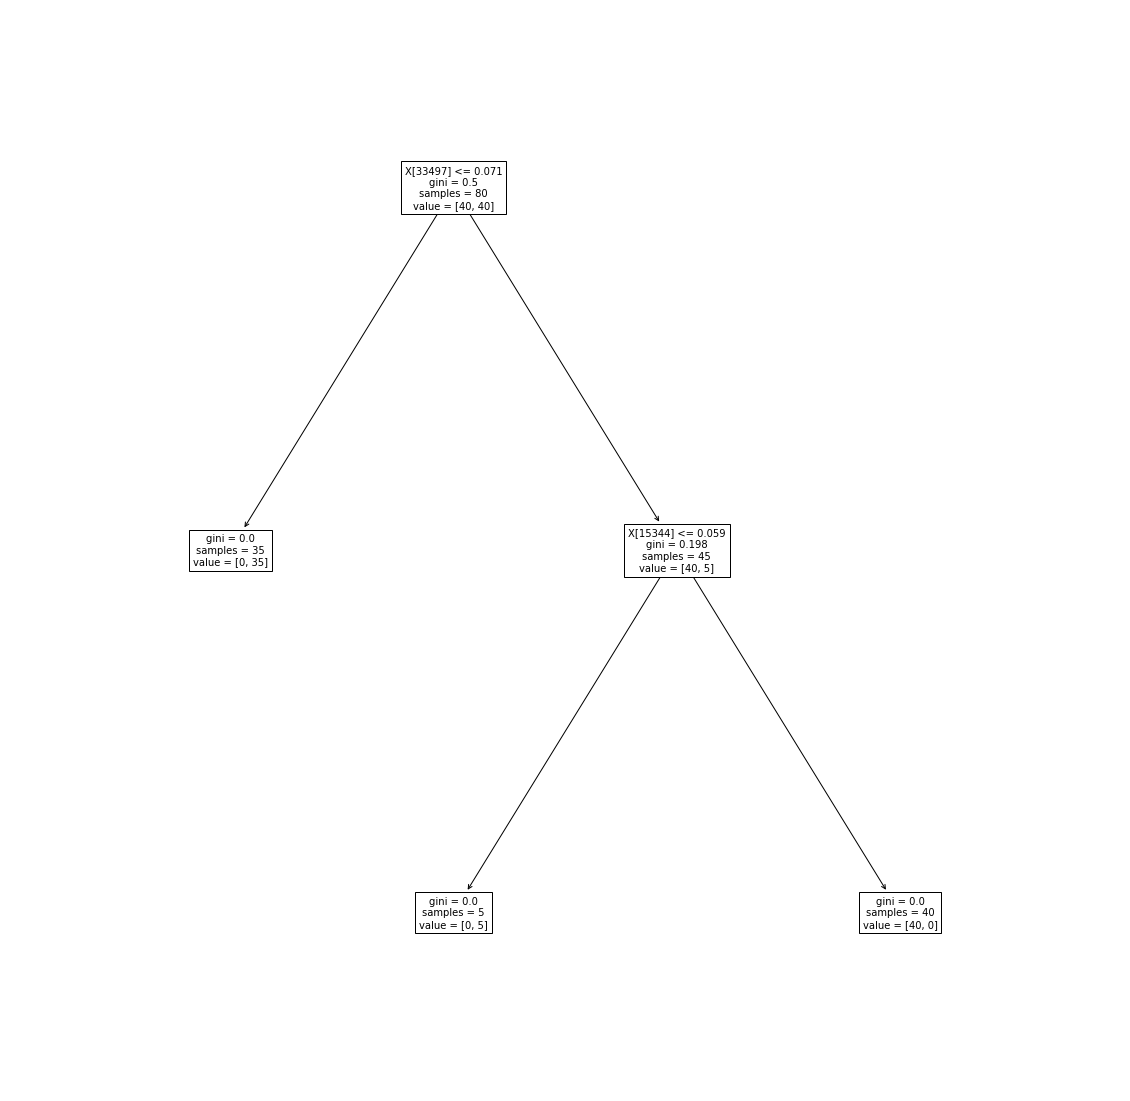

In [ ]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10)
plt.show()

menampilkan diagram tree dari sebuah model Decision Tree. 

Feature: 15344, Score: 0.22222
Feature: 33497, Score: 0.77778


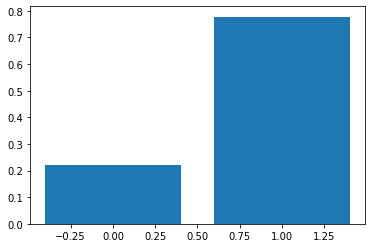

In [ ]:
from matplotlib import pyplot


importance = clf.feature_importances_
simp = np.zeros(len(importance))

for i,v in enumerate(importance):
  if v!=0:
	  print('Feature: %0d, Score: %.5f' % (i,v))
  simp[i] = v
simp = simp[simp != 0] 
pyplot.bar([x for x in range(len(simp))], simp)
pyplot.show()

menampilkan feature importance

Random Forest

In [ ]:
import numpy as np
import cv2

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224)))
  nil_pix = image_to_feature_vector(gmbrz)

  kumpl_gmbr.append(nil_pix)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(latihX, latihY)
acc = RF.score(ujiX, ujiY)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] raw pixel accuracy: 100.00%


Pembentukkan model Random Forest dan proses latih serta evaluasi

In [ ]:
predict = RF.predict(ujiX)
# rounded_pred=np.argmax(predict, axis=1)
# rounded_ujiY=np.argmax(ujiY, axis=1)
print(confusion_matrix(ujiY, predict))


[[10  0]
 [ 0 10]]


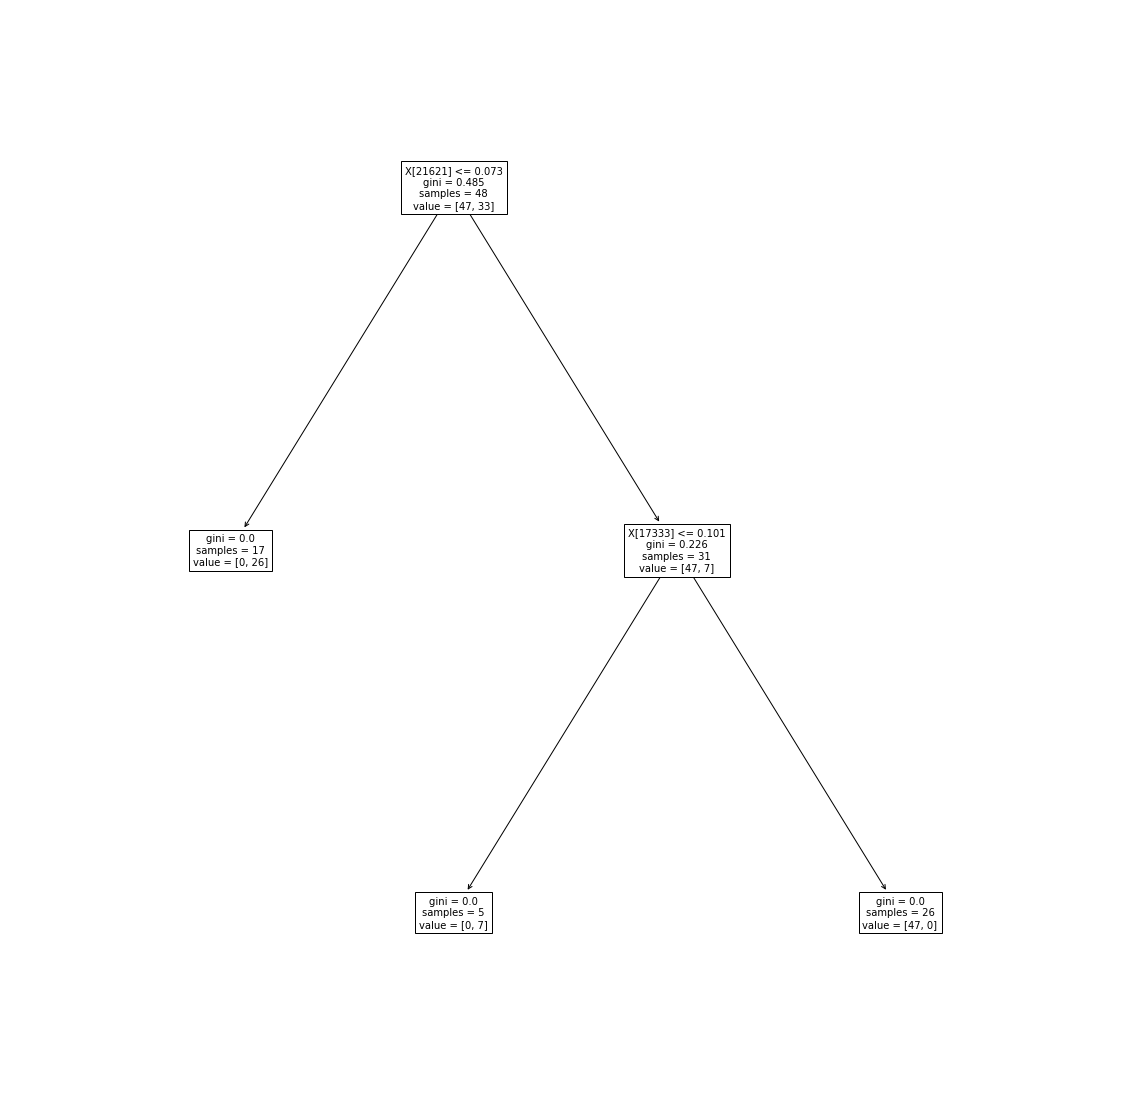

In [ ]:
from sklearn.tree import export_graphviz

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(RF.estimators_[0], fontsize=10)

plt.show()

Feature: 100, Score: 0.00049
Feature: 376, Score: 0.00091
Feature: 601, Score: 0.00049
Feature: 998, Score: 0.00049
Feature: 1173, Score: 0.00049
Feature: 1461, Score: 0.00024
Feature: 1765, Score: 0.00163
Feature: 2271, Score: 0.00049
Feature: 2959, Score: 0.00043
Feature: 3060, Score: 0.00049
Feature: 3261, Score: 0.00131
Feature: 3300, Score: 0.00047
Feature: 3596, Score: 0.00136
Feature: 3627, Score: 0.00296
Feature: 3740, Score: 0.00139
Feature: 4199, Score: 0.00050
Feature: 4389, Score: 0.00049
Feature: 4457, Score: 0.00049
Feature: 4476, Score: 0.00119
Feature: 4805, Score: 0.00133
Feature: 5134, Score: 0.00165
Feature: 5687, Score: 0.00245
Feature: 5707, Score: 0.00071
Feature: 5949, Score: 0.00050
Feature: 6147, Score: 0.00139
Feature: 6256, Score: 0.00075
Feature: 6370, Score: 0.00048
Feature: 6440, Score: 0.00049
Feature: 6442, Score: 0.00049
Feature: 6600, Score: 0.00044
Feature: 6646, Score: 0.00188
Feature: 6718, Score: 0.00033
Feature: 6871, Score: 0.00140
Feature: 6879,

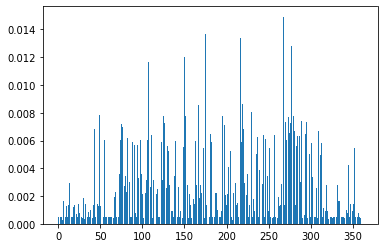

In [ ]:
from matplotlib import pyplot


importance = RF.feature_importances_
simp = np.zeros(len(importance))

for i,v in enumerate(importance):
  if v!=0:
	  print('Feature: %0d, Score: %.5f' % (i,v))
  simp[i] = v
simp = simp[simp != 0] 
pyplot.bar([x for x in range(len(simp))], simp)
pyplot.show()